In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
kospi=pd.read_csv('./data/pre_kospi.csv')
kospi.head(3)

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366


In [4]:
kospi.drop('Unnamed: 0' , axis =1, inplace = True)

In [5]:
kospi.head(5)

,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,2718.89,0.0095,2022-04-19,-3431,331,3364


In [6]:
kospi['날짜']

0       2022-04-25
1       2022-04-22
2       2022-04-21
3       2022-04-20
4       2022-04-19
           ...    
4276    2005-01-07
4277    2005-01-06
4278    2005-01-05
4279    2005-01-04
4280    2005-01-03
Name: 날짜, Length: 4281, dtype: object

In [7]:
#폰트 맑은 고딕으로 변경
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

### 코스피 종가 및 등락율 그래프 그리기

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '코스피 종가 분포')

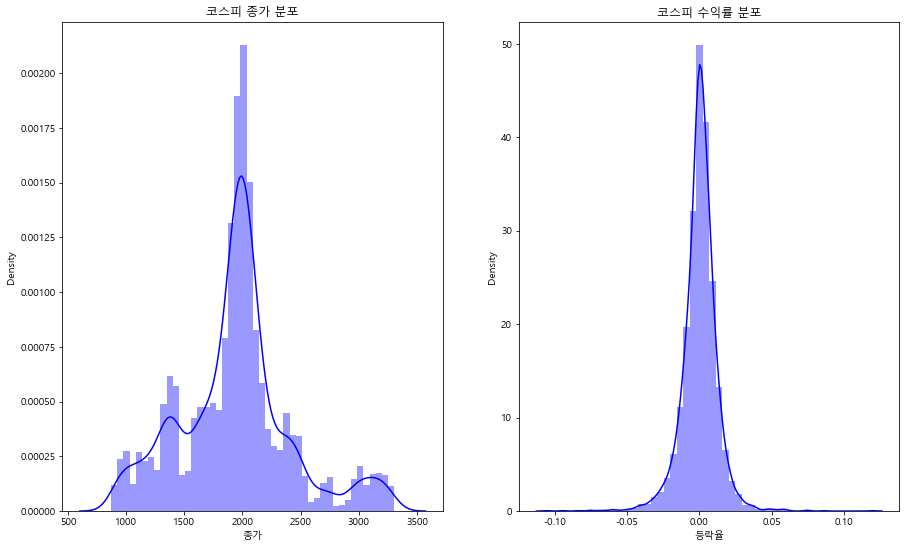

In [111]:
plt.figure(figsize= (15,9))
plt.subplot(1,2,2)
sns.distplot(kospi['등락율'], color = 'blue')
plt.title('코스피 수익률 분포')
plt.subplot(1,2,1)
sns.distplot(kospi['종가'],color = 'blue')
plt.title('코스피 종가 분포')


### 종속변수(kospi)에 대해 정규성 검증

**1) 코스피 종가 정규성 검증**

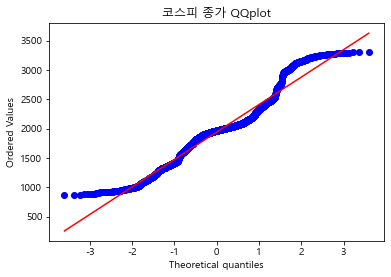

In [113]:
# 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(kospi['종가'],plot=plt) 
plt.title('코스피 종가 QQplot')
plt.show()

In [10]:
# shapiro 검정 시행
from scipy.stats import shapiro

test_stat, pval = shapiro(kospi['등락율'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pd.DataFrame(kospi['종가']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


In [11]:
print(f'test-statistics:{test_stat} , p-value :{pval}')

test-statistics:0.9144764542579651 , p-value :0.0


----> 귀무가설을 기각 한다. (정규분포를 따르지 않는다.)

**1) 코스피 등락율 정규성 검증**

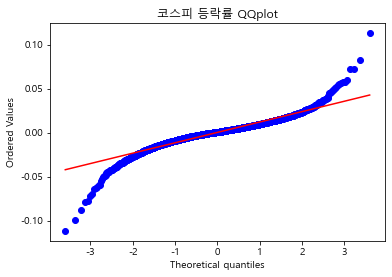

In [112]:
# 정규성 검정 (시각화)
from scipy.stats import probplot
probplot(np.log1p(kospi['등락율']),plot=plt) 
plt.title('코스피 등락률 QQplot')
plt.show()

In [13]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(np.log1p(kospi['등락율']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(np.log1p(kospi['등락율']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


---> 귀무가설을 기각 할 수 있다. (정규분포를 따르지 않는다.)

### 일별 코스피 종가 및 등락율이 정규분포 검정에서 유의하지 않아
### 코스피 일별 데이터를 월별 데이터로 바꾸기 

In [44]:
# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
kospi_3y = kospi.reset_index()
end_date2 = kospi_3y['날짜'].astype(str).iloc[0]
start_date2 = kospi_3y['날짜'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all2 = pd.date_range(start_date2, end_date2, freq='BM').to_frame().rename(columns={0:'날짜'}).reset_index(drop=True)
date_all2.head()
date_all2

,날짜
0,2005-01-31
1,2005-02-28
2,2005-03-31
3,2005-04-29
4,2005-05-31
...,...
202,2021-11-30
203,2021-12-31
204,2022-01-31
205,2022-02-28


In [45]:
kospi_3y['날짜']=kospi_3y['날짜'].astype('str')

In [46]:
kospi_3y['날짜']=pd.to_datetime(kospi_3y['날짜'])

In [47]:
# 데이터 병합 (영업일 date와 kospi 병합)
kospi_all2 = pd.merge(date_all2, kospi_3y ,how='left')
kospi_all2 


,날짜,index,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005-01-31,4260.0,932.70,0.0121,-1202.0,-468.0,1670.0
1,2005-02-28,4243.0,1011.36,0.0145,-365.0,2884.0,-2519.0
2,2005-03-31,4221.0,965.68,0.0107,-659.0,215.0,444.0
3,2005-04-29,4201.0,911.30,-0.0070,-807.0,-865.0,1671.0
4,2005-05-31,4180.0,970.21,0.0012,-1100.0,79.0,1022.0
...,...,...,...,...,...,...,...
202,2021-11-30,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0
203,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN
204,2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN
205,2022-02-28,38.0,2699.18,0.0084,2908.0,966.0,-3801.0


In [48]:
print(f'Nan값 개수 확인 : {kospi_all2["종가"].isna().value_counts()[1]}')

kospi_all2.head()

Nan값 개수 확인 : 22


,날짜,index,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005-01-31,4260.0,932.70,0.0121,-1202.0,-468.0,1670.0
1,2005-02-28,4243.0,1011.36,0.0145,-365.0,2884.0,-2519.0
2,2005-03-31,4221.0,965.68,0.0107,-659.0,215.0,444.0
3,2005-04-29,4201.0,911.30,-0.0070,-807.0,-865.0,1671.0
4,2005-05-31,4180.0,970.21,0.0012,-1100.0,79.0,1022.0


In [53]:
# 직전 값으로 NaN 값 채우기
# BM으로 했는데 우리나라 일자랑 맞지 않았다.
kospi_all2 = kospi_all2.fillna(method='ffill')

print('Nan값 개수 확인')
print(kospi_all2["종가"].isna().value_counts())

kospi_all2

Nan값 개수 확인
False    207
Name: 종가, dtype: int64


,날짜,index,종가,등락율,개인순매수,외국인순매수,기관순매수
0,2005-01-31,4260.0,932.70,0.0121,-1202.0,-468.0,1670.0
1,2005-02-28,4243.0,1011.36,0.0145,-365.0,2884.0,-2519.0
2,2005-03-31,4221.0,965.68,0.0107,-659.0,215.0,444.0
3,2005-04-29,4201.0,911.30,-0.0070,-807.0,-865.0,1671.0
4,2005-05-31,4180.0,970.21,0.0012,-1100.0,79.0,1022.0
...,...,...,...,...,...,...,...
202,2021-11-30,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0
203,2021-12-31,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0
204,2022-01-31,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0
205,2022-02-28,38.0,2699.18,0.0084,2908.0,966.0,-3801.0


In [59]:
# 각 월당 마지막 영업일 도출
month_end = pd.date_range('2005-01-03', '2022-04-25', freq='BM')

# 마지막 영업일 제외후 나머지 drop
kospi_bm = kospi_all2[kospi_all2['날짜'].isin(month_end)].reset_index(drop=True)
kospi_bm = kospi_bm.set_index(kospi_bm['날짜'])
kospi_bm = kospi_bm.drop(columns='날짜')
kospi_bm.drop('index' , axis = 1, inplace = True)

In [65]:
kospi_bm.to_csv('./data/pre_month_kospi.csv', encoding='cp949')

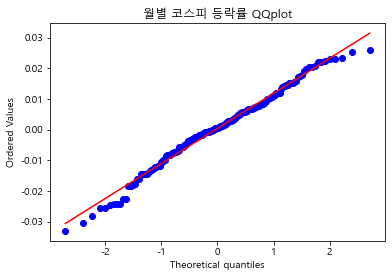

In [114]:
# 정규성 검정 (시각화)
from scipy.stats import probplot
probplot(kospi_bm['등락율'],plot=plt) 
plt.title('월별 코스피 등락률 QQplot')
plt.show()

In [69]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(kospi_bm['등락율'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(kospi_bm['등락율'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  6.03926852% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  20.01962884% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


----->정규성을 만족한다.

In [72]:
kospi_bm

,종가,등락율,개인순매수,외국인순매수,기관순매수
날짜,,,,,
2005-01-31,932.70,0.0121,-1202.0,-468.0,1670.0
2005-02-28,1011.36,0.0145,-365.0,2884.0,-2519.0
2005-03-31,965.68,0.0107,-659.0,215.0,444.0
2005-04-29,911.30,-0.0070,-807.0,-865.0,1671.0
2005-05-31,970.21,0.0012,-1100.0,79.0,1022.0
...,...,...,...,...,...
2021-11-30,2839.01,-0.0242,7338.0,-1332.0,-6400.0
2021-12-31,2839.01,-0.0242,7338.0,-1332.0,-6400.0
2022-01-31,2839.01,-0.0242,7338.0,-1332.0,-6400.0


In [70]:
import plotly.express as px
import plotly.io as pio
import os #꼭 넣기
pio.renderers.default = "notebook_connected"
import numpy as np
import plotly.graph_objects as go

In [109]:
# #개인순매수	외국인순매수 기관순매수 plot찍기
# fig = px.line(kospi_bm, x="date", y="개인순매수", title='개인순매수와 코스피 등락률 산점도')
# fig = px.line(kospi_bm, x="date", y="외국인순매수", title='외국인순매수와 코스피 등락률 산점도')
# fig = px.line(kospi_bm, x="date", y="기관순매수", title='기관순매수와 코스피 등락률 산점도')


# fig.add_trace(go.Scatter(x=kospi_bm.index,y=kospi_bm['개인순매수'],
#              line=dict(dash='solid',shape='spline',color='red'), name='개인순매수'))
# fig.add_trace(go.Scatter(x=kospi_bm.index,y=kospi_bm['외국인순매수'],
#              line=dict(dash='solid',shape='spline',color='red'), name='외국인순매수'))
# fig.add_trace(go.Scatter(x=kospi_bm.index,y=kospi_bm['기관순매수'],
#              line=dict(dash='solid',shape='spline',color='red'), name='동행지수'))

# # 기본 폰트 설정
# # fig.add_trace(go.Scatter(x=data['date'],y=b,
# #              mode='lines', name='선행지수'))


# layout_font = {'font':dict(size=18,color='#60606e',family='Franklin Gothic' )}
# fig.update_layout(title='<b>매매주체별 코스피 등락률 산점도</b>', **layout_font)


# fig.show()

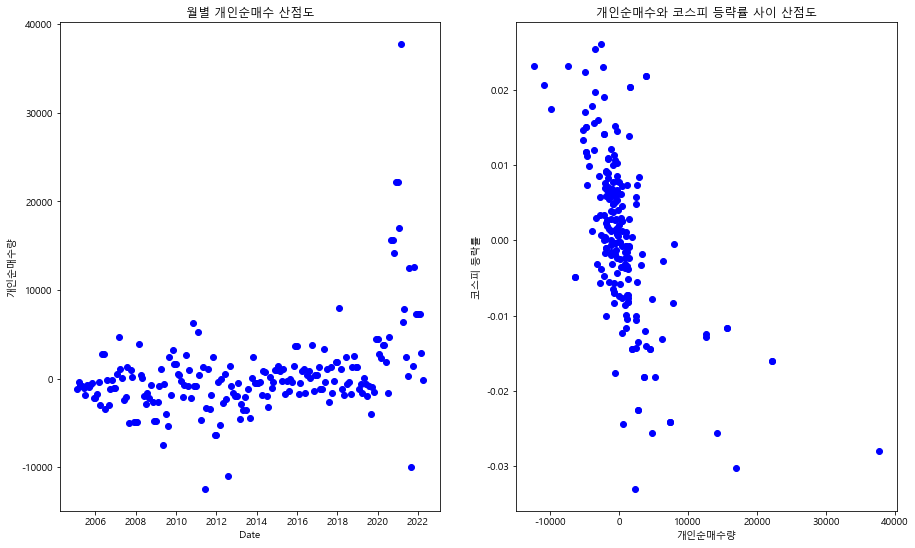

In [105]:
plt.figure(figsize= (15,9))
plt.subplot(1,2,1)
plt.scatter(x=kospi_bm.index,y=kospi_bm['개인순매수'],color='blue')
plt.xlabel('Date')
plt.ylabel('개인순매수량')
plt.title('월별 개인순매수 산점도')

plt.subplot(1,2,2)
plt.scatter(x=kospi_bm['개인순매수'],y=kospi_bm['등락율'],color='blue')
plt.xlabel('개인순매수량')
plt.ylabel('코스피 등락률')
plt.title('개인순매수와 코스피 등략률 사이 산점도')
plt.show()

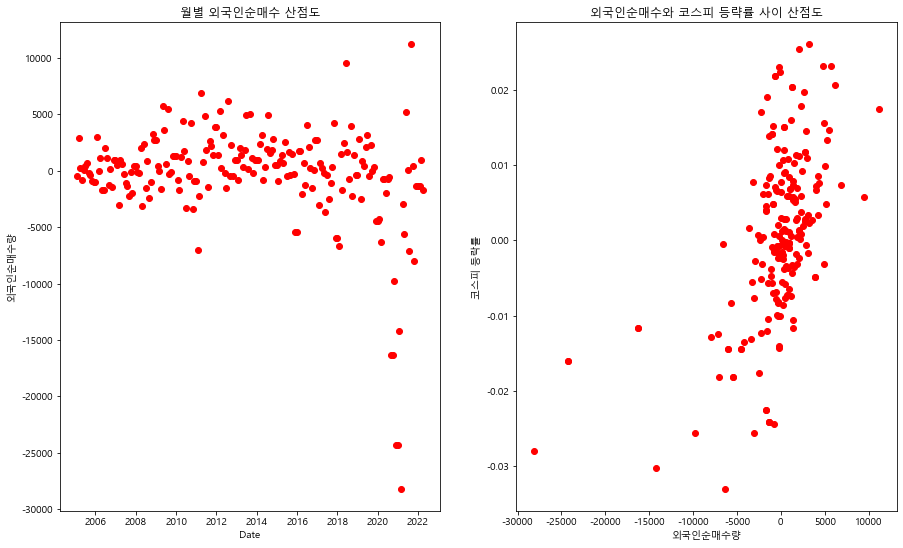

In [107]:
plt.figure(figsize= (15,9))
plt.subplot(1,2,1)
plt.scatter(x=kospi_bm.index,y=kospi_bm['외국인순매수'],color='red')
plt.xlabel('Date')
plt.ylabel('외국인순매수량')
plt.title('월별 외국인순매수 산점도')

plt.subplot(1,2,2)
plt.scatter(x=kospi_bm['외국인순매수'],y=kospi_bm['등락율'],color='red')
plt.xlabel('외국인순매수량')
plt.ylabel('코스피 등락률')
plt.title('외국인순매수와 코스피 등략률 사이 산점도')
plt.show()

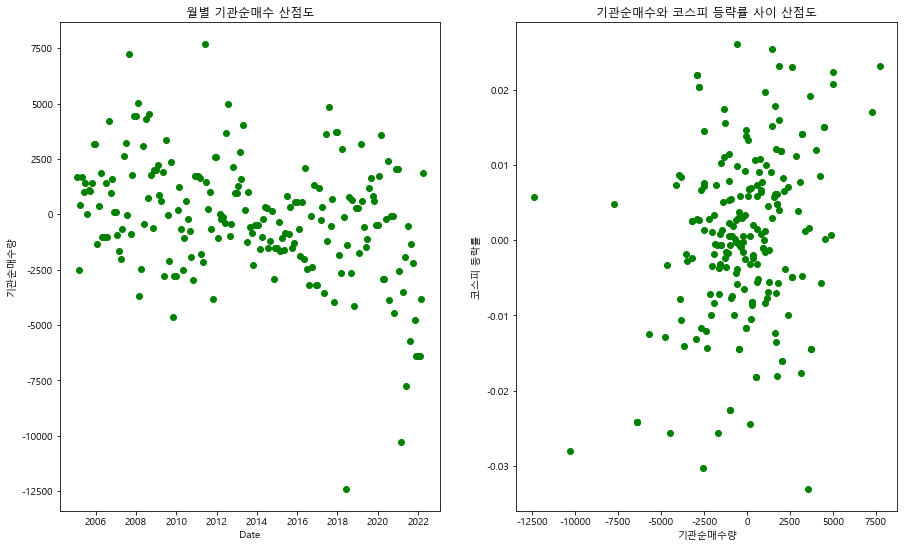

In [108]:
plt.figure(figsize= (15,9))
plt.subplot(1,2,1)
plt.scatter(x=kospi_bm.index,y=kospi_bm['기관순매수'],color='green')
plt.xlabel('Date')
plt.ylabel('기관순매수량')
plt.title('월별 기관순매수 산점도')

plt.subplot(1,2,2)
plt.scatter(x=kospi_bm['기관순매수'],y=kospi_bm['등락율'],color='green')
plt.xlabel('기관순매수량')
plt.ylabel('코스피 등락률')
plt.title('기관순매수와 코스피 등략률 사이 산점도')
plt.show()

In [103]:
#한번에 그리기
# colors = sns.color_palette('hls',3)
 
# fig = plt.figure(figsize=(8,8))
# fig.set_facecolor('white')
# ys = kospi_bm[['개인순매수','기관순매수','외국인순매수']]
# for i, y in enumerate(ys):
#     plt.scatter(kospi_bm.index, y, color=colors[i], label=f'Group({i})')
    
# plt.legend()
# plt.show()

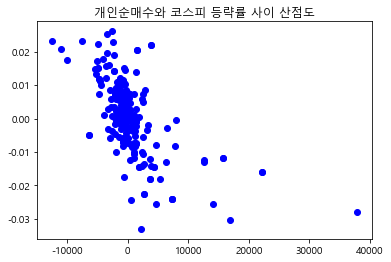

In [86]:
plt.scatter(x=kospi_bm['개인순매수'],y=kospi_bm['등락율'],color='blue')
plt.title('개인순매수와 코스피 등략률 사이 산점도')
plt.show()

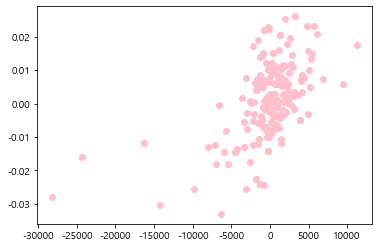

In [84]:
plt.scatter(x=kospi_bm['외국인순매수'],y=kospi_bm['등락율'],color='pink')
plt.show()

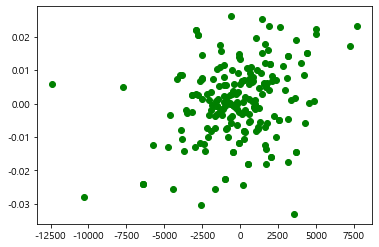

In [85]:
plt.scatter(x=kospi_bm['기관순매수'],y=kospi_bm['등락율'],color='green')
plt.show()

#### 히트맵 : 일별 매수량과 코스피등락률 사이 히트맵

<AxesSubplot:>

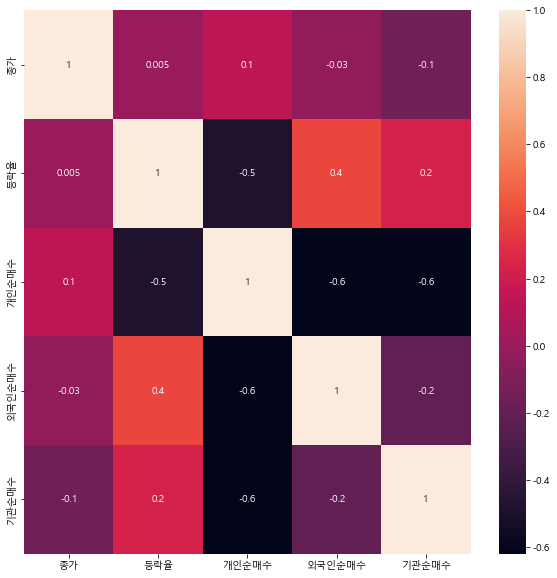

In [115]:
heat=pd.read_csv('./data/pre_kospi.csv')
heat.drop('Unnamed: 0', axis = 1, inplace = True)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

corr=heat.corr() # 상관관계 리턴 
corr


plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.1g') 